## DL Lab Assignment 1
### Kumar Dipak SK Singh (20MAI0060)

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Excercise 1
### Classification using Single Layer Perceptron

### Training

- I am using Sigmoid function as the activation function

In [4]:
def activation_func(value):    #Sigmoid
    return (1/(1+np.exp(-value)))

In [5]:
def perceptron_train(in_data,labels,alpha):
    X=np.array(in_data)
    y=np.array(labels)
    print(in_data)
    weights=np.random.random(X.shape[1])
    original=weights
    bias=np.random.random_sample()
    for key in range(X.shape[0]):
        a=activation_func(np.matmul(np.transpose(weights),X[key]))     
        yn=0
        if a>0.5:
            yn=1
        weights=weights+alpha*(yn-y[key])*X[key]
        print('Iteration '+str(key)+': '+str(weights))
    print('Difference: '+str(weights-original))
    return weights

#### Testing and Score

In [6]:
def perceptron_test(in_data,label_shape,weights):
    X=np.array(in_data)
    y=np.zeros(label_shape)
    for key in range(X.shape[0]):
        a=activation_func((weights*X[key]).sum())
        y[key]=0
        if a>0.5:
            y[key]=1
    return y

In [7]:
def score(result,labels):
    difference=result-np.array(labels)
    correct_ctr=0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            correct_ctr+=1
    score=correct_ctr*100/difference.size
    print('Score='+str(score))

In [8]:
d_train_x = [[1,2,3],
           [4,5,6],
           [7,8,9]]
d_test_X = [[4,7,8],[2,3,5],[1,4,8],[3,4,5]]

d_train_y = [0,1,1]

d_test_y = [1,0,0,1]

In [9]:
# Learning rate 
alpha=0.05

# Train
weights=perceptron_train(d_train_x,d_train_y,alpha)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Iteration 0: [0.88119497 0.61335908 0.66356168]
Iteration 1: [0.88119497 0.61335908 0.66356168]
Iteration 2: [0.88119497 0.61335908 0.66356168]
Difference: [0.05 0.1  0.15]


In [10]:
# Test
result_test=perceptron_test(d_test_X,np.array(d_test_y).shape,weights)

In [11]:
# Calculate score
score(result_test,d_test_y)

Score=50.0


## Excercise 2
### Backpropagation_Implementation

In [12]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [13]:
def sigmoid_prime(x):
    return sigmoid(x)*(1.0 - sigmoid(x))

In [14]:
class NeuralNetwork(object):
    
    def __init__(self, architecture):
        #architecture - numpy array with ith element representing the number of neurons in the ith layer.
        
        #Initialize the network architecture
        self.L = architecture.size - 1 #The index of the last layer L
        self.n = architecture #n stores the number of neurons in each layer
        self.input_size = self.n[0] #input_size is the number of neurons in the first layer
        self.output_size = self.n[self.L] #output_size is the number of neurons in the last layer
        
        #Parameters will store the network parameters, i.e. the weights and biases
        self.parameters = {}
        
        #Initialize the network weights and biases:
        for i in range (1, self.L + 1): 
            #Initialize weights to small random values
            self.parameters['W' + str(i)] = np.random.randn(self.n[i], self.n[i - 1]) * 0.01
            
            #Initialize rest of the parameters to 1
            self.parameters['b' + str(i)] = np.ones((self.n[i], 1))
            self.parameters['z' + str(i)] = np.ones((self.n[i], 1))
            self.parameters['a' + str(i)] = np.ones((self.n[i], 1))
        
        #As we started the loop from 1, we haven't initialized a[0]:
        self.parameters['a0'] = np.ones((self.n[i], 1))
        
        #Initialize the cost:
        self.parameters['C'] = 1
        
        #Create a dictionary for storing the derivatives:
        self.derivatives = {}
        
        #Learning rate
        self.alpha = 0.01
            
    def forward_propagate(self, X):
        #Note that X here, is just one training example
        self.parameters['a0'] = X
        
        #Calculate the activations for every layer l
        for l in range(1, self.L + 1):
            self.parameters['z' + str(l)] = np.add(np.dot(self.parameters['W' + str(l)], self.parameters['a' + str(l - 1)]), self.parameters['b' + str(l)])
            self.parameters['a' + str(l)] = sigmoid(self.parameters['z' + str(l)])
        
    def compute_cost(self, y):
        self.parameters['C'] = -(y*np.log(self.parameters['a' + str(self.L)]) + (1-y)*np.log( 1 - self.parameters['a' + str(self.L)]))
    
    def compute_derivatives(self, y):
        #Partial derivatives of the cost function with respect to z[L], W[L] and b[L]:        
        #dzL
        self.derivatives['dz' + str(self.L)] = self.parameters['a' + str(self.L)] - y
        #dWL
        self.derivatives['dW' + str(self.L)] = np.dot(self.derivatives['dz' + str(self.L)], np.transpose(self.parameters['a' + str(self.L - 1)]))
        #dbL
        self.derivatives['db' + str(self.L)] = self.derivatives['dz' + str(self.L)]

        #Partial derivatives of the cost function with respect to z[l], W[l] and b[l]
        for l in range(self.L-1, 0, -1):
            self.derivatives['dz' + str(l)] = np.dot(np.transpose(self.parameters['W' + str(l + 1)]), self.derivatives['dz' + str(l + 1)])*sigmoid_prime(self.parameters['z' + str(l)])
            self.derivatives['dW' + str(l)] = np.dot(self.derivatives['dz' + str(l)], np.transpose(self.parameters['a' + str(l - 1)]))
            self.derivatives['db' + str(l)] = self.derivatives['dz' + str(l)]
            
    def update_parameters(self):
        for l in range(1, self.L+1):
            self.parameters['W' + str(l)] -= self.alpha*self.derivatives['dW' + str(l)]
            self.parameters['b' + str(l)] -= self.alpha*self.derivatives['db' + str(l)]
        
    def predict(self, x):
        self.forward_propagate(x)
        
        #self.parameters['a0'] = X
        
        #Calculate the activations for every layer l
        #for i in range(1, self.L + 1):
         #   self.parameters['z' + str(i)] = np.add(np.dot(self.parameters['W' + str(i)], self.parameters['a' + str(i - 1)]), self.parameters['b' + str(i)])
          #  self.parameters['a' + str(i)] = sigmoid(self.parameters['z' + str(i)])

        return self.parameters['a' + str(self.L)]
        
    def fit(self, X, Y, num_iter):
        for iter in range(0, num_iter):
            c = 0
            acc = 0
            n_c = 0
            for i in range(0, X.shape[0]):
              x = X[i].reshape((X[i].size, 1))
              y = Y[i]
              self.forward_propagate(x)
              self.compute_cost(y)
              c += self.parameters['C'] 
              y_pred = self.predict(x)
              y_pred = (y_pred > 0.5)
              if y_pred == y:
                  n_c += 1
              self.compute_derivatives(y)
              self.update_parameters()
            
            c = c/X.shape[0]
            acc = (n_c/X.shape[0])*100
            print('Iteration: ', iter)
            print("Cost: ", c)
            print("Accuracy:", acc)

In [15]:
dataset = pd.read_csv('wheat-seeds-binary.csv')

In [16]:
dataset.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


dataset.describe()

In [17]:
shuffled_dataset = dataset.sample(frac=1).reset_index(drop=True)
shuffled_dataset['Class'] = shuffled_dataset['Class'] - 1

In [18]:
X = shuffled_dataset.iloc[:, 0:-1].values
y = shuffled_dataset.iloc[:, -1].values

In [19]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
architecture = np.array([7, 2, 1])

In [22]:
classifier = NeuralNetwork(architecture)

In [23]:
classifier.fit(X_train, y_train, 10)

Iteration:  0
Cost:  [[0.7828679]]
Accuracy: 48.97959183673469
Iteration:  1
Cost:  [[0.72809264]]
Accuracy: 48.97959183673469
Iteration:  2
Cost:  [[0.70213804]]
Accuracy: 48.97959183673469
Iteration:  3
Cost:  [[0.6868178]]
Accuracy: 48.97959183673469
Iteration:  4
Cost:  [[0.67468632]]
Accuracy: 80.61224489795919
Iteration:  5
Cost:  [[0.66278103]]
Accuracy: 82.6530612244898
Iteration:  6
Cost:  [[0.64988267]]
Accuracy: 77.55102040816327
Iteration:  7
Cost:  [[0.63550783]]
Accuracy: 76.53061224489795
Iteration:  8
Cost:  [[0.61956366]]
Accuracy: 78.57142857142857
Iteration:  9
Cost:  [[0.60221047]]
Accuracy: 82.6530612244898


In [24]:
acc = 0
n_c = 0
for i in range(0, X_test.shape[0]):
  x = X_test[i].reshape((X_test[i].size, 1))
  y = y_test[i]
  y_pred = classifier.predict(x)
  y_pred = (y_pred > 0.5)
  #print('Expected: %d Got: %d' %(y, y_pred))
  if y_pred == y:
      n_c += 1

acc = (n_c/X_test.shape[0])*100
print("Test Accuracy", acc)

Test Accuracy 88.09523809523809


## Excercise 3
### Extract Feature of Image

In [25]:
import cv2
import os
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [26]:
imgs = load_images_from_folder('Random_Images')

In [27]:
type(imgs)

list

<Figure size 432x288 with 0 Axes>

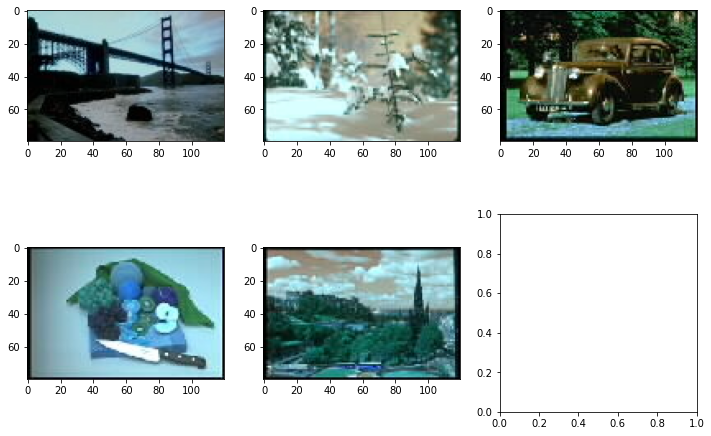

In [28]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,3,figsize=(12,8)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0,0].imshow(imgs[0])
axarr[0,1].imshow(imgs[1])
axarr[0,2].imshow(imgs[2])
axarr[1,0].imshow(imgs[3])
axarr[1,1].imshow(imgs[4])


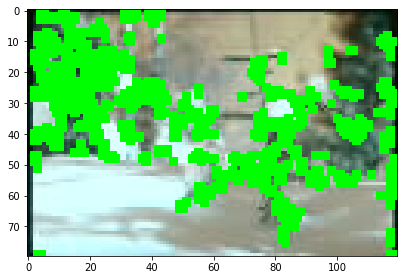

In [29]:
#Haris corner detection
img = imgs[1]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

dst = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img[dst > 0.01 * dst.max()] = [0, 255, 0]

imshow(img)

<ipython-input-33-99c321fc215b>:13: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img, (x, y), 6, (0, 255, 0), -1)


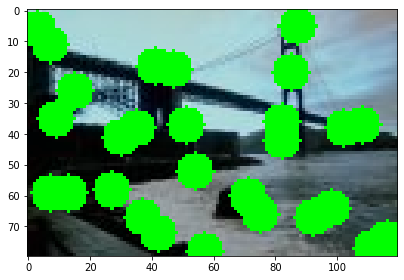

In [33]:
#Shi-Tomasi corner detection
img = imgs[0]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray_img, 
                                  maxCorners=50,
                                  qualityLevel=0.02, 
                                  minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x, y), 6, (0, 255, 0), -1)

imshow(img)

Text(0.5, 1.0, 'histogram of gray values')

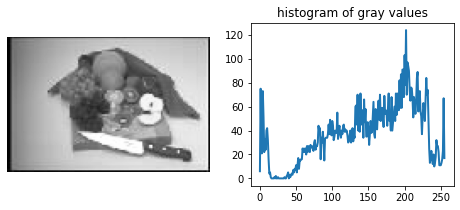

In [38]:
from skimage.exposure import histogram
gray_img1 = cv2.cvtColor(imgs[3], cv2.COLOR_BGR2GRAY)

hist, hist_centers = histogram(gray_img1)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(gray_img1, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

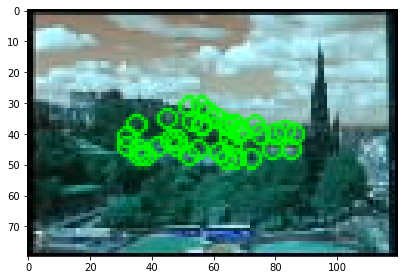

In [40]:
gray_img2 = cv2.cvtColor(imgs[4], cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_img2, None)

kp_img = cv2.drawKeypoints(imgs[4], kp, None, color=(0, 255, 0), flags=0)
imshow(kp_img)